# OPTIVER - TRADING AT THE CLOSE

## Import Libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Insert Data + Read Data

In [3]:
df_train = pd.read_csv('train.csv')
df_train.describe()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
count,5.237980e+06,5.237980e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237760e+06,2.343638e+06,2.380800e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237892e+06,5.237980e+06
mean,9.928856e+01,2.415100e+02,2.700000e+02,5.715293e+06,-1.189619e-02,9.999955e-01,4.510025e+07,1.001713e+00,9.996601e-01,9.997263e-01,5.181359e+04,1.000264e+00,5.357568e+04,9.999920e-01,-4.756125e-02,1.331005e+04
std,5.787176e+01,1.385319e+02,1.587451e+02,2.051591e+07,8.853374e-01,2.532497e-03,1.398413e+08,7.214705e-01,1.216920e-02,2.499345e-03,1.114214e+05,2.510042e-03,1.293554e+05,2.497509e-03,9.452860e+00,7.619271e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.352850e-01,4.316610e+03,7.700000e-05,7.869880e-01,9.349150e-01,0.000000e+00,9.398270e-01,0.000000e+00,9.380080e-01,-3.852898e+02,0.000000e+00
25%,4.900000e+01,1.220000e+02,1.300000e+02,8.453415e+04,-1.000000e+00,9.987630e-01,5.279575e+06,9.963320e-01,9.971000e-01,9.985290e-01,7.374720e+03,9.990290e-01,7.823700e+03,9.987810e-01,-4.559755e+00,6.729000e+03
50%,9.900000e+01,2.420000e+02,2.700000e+02,1.113604e+06,0.000000e+00,9.999670e-01,1.288264e+07,9.998830e-01,9.998890e-01,9.997280e-01,2.196900e+04,1.000207e+00,2.301792e+04,9.999970e-01,-6.020069e-02,1.334500e+04
75%,1.490000e+02,3.610000e+02,4.100000e+02,4.190951e+06,1.000000e+00,1.001174e+00,3.270013e+07,1.003318e+00,1.002590e+00,1.000905e+00,5.583168e+04,1.001414e+00,5.787841e+04,1.001149e+00,4.409552e+00,1.990700e+04
max,1.990000e+02,4.800000e+02,5.400000e+02,2.982028e+09,1.000000e+00,1.077488e+00,7.713682e+09,4.379531e+02,1.309732e+00,1.077488e+00,3.028784e+07,1.077836e+00,5.440500e+07,1.077675e+00,4.460704e+02,2.645400e+04


In [4]:
df_train.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


## Check for missing values

In [5]:
missing_values_count = df_train.isnull().sum()
print(missing_values_count)

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64


## Handling missing values in the Data

In [6]:
from sklearn.impute import SimpleImputer

# Drop rows with missing values
columns_missing_values = ['imbalance_size', 'reference_price', 'matched_size', 'bid_price', 'ask_price', 'wap', 'target']
df_train = df_train.dropna(subset=columns_missing_values)

# Drop columns
df_train = df_train.drop(columns=['far_price', 'near_price', 'row_id'])


In [7]:
missing_values_count = df_train.isnull().sum()
print(missing_values_count)
df_train.tail()

stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
dtype: int64


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454
5237979,199,480,540,1884285.71,-1,1.002129,24073677.32,1.002129,250081.44,1.002447,300167.56,1.002274,-6.530285,26454


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5237760 entries, 0 to 5237979
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   bid_price                float64
 8   bid_size                 float64
 9   ask_price                float64
 10  ask_size                 float64
 11  wap                      float64
 12  target                   float64
 13  time_id                  int64  
dtypes: float64(9), int64(5)
memory usage: 599.4 MB


## Target before training

<Axes: >

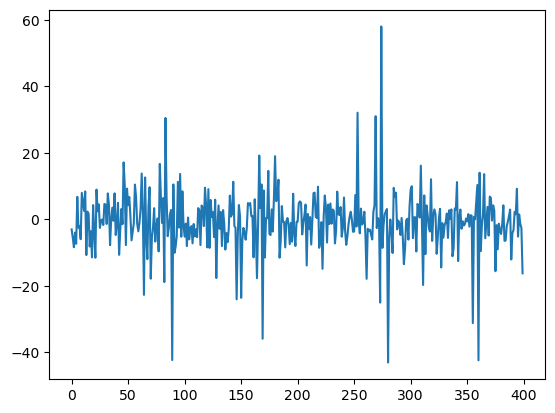

In [9]:
df_train.head(400)['target'].plot()

## Handling missing values in the Data

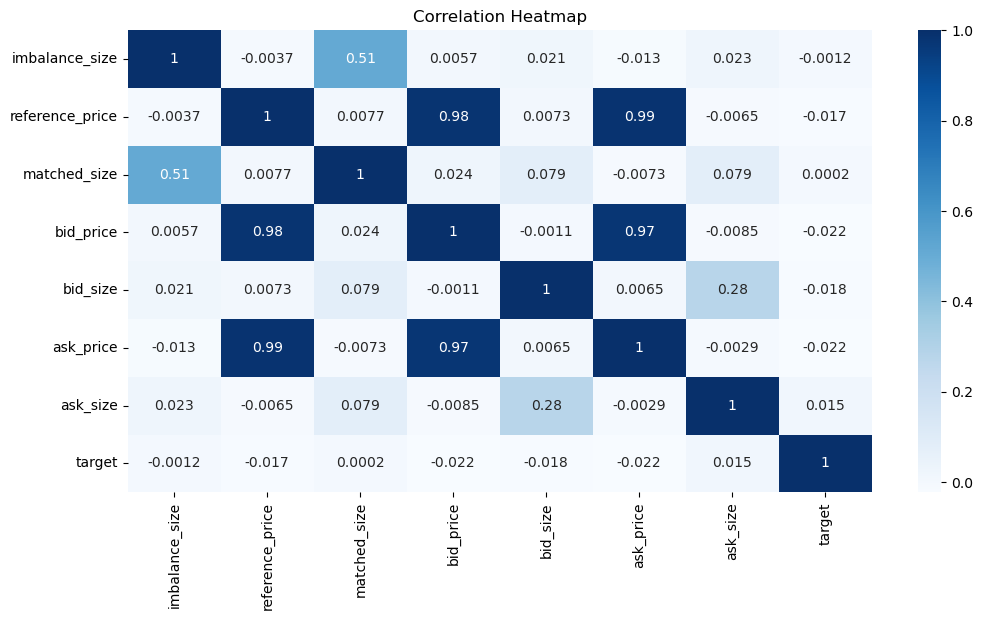

In [10]:
selected_columns = ['imbalance_size', 'reference_price', 'matched_size', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'target']
selected_data = df_train[selected_columns]

plt.figure(figsize=(12,6))

sns.heatmap(selected_data.corr(), cmap="Blues", annot=True) #Dropping the first column bc it is date 
plt.title('Correlation Heatmap')
plt.show()

## Training the dataset

In [11]:
y = df_train['target'].values
x = df_train.drop(columns='target')

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state = 0) ## The 0.2 is 20% testing

In [12]:
# Creating the Linear Regression Model

regressor = LinearRegression()

# fit linear regression

model = regressor.fit(x_train, y_train)

# Use model to make predictions
y_train_pred = regressor.predict(x_train)

# Interception and coef.(to have an idea of training)

print("Regressor Coefficient: ",regressor.coef_)
print("Regressor Intercept: ",regressor.intercept_)

# predicting results
print("Predicted results: ",y_train_pred)

Regressor Coefficient:  [ 6.55924675e-05 -1.09817649e-04 -1.76976530e-04 -1.21448041e-09
  4.04368267e-02  1.31148663e+03  1.28915924e-10  2.47950016e+03
  7.35397935e-07  2.40667792e+03 -6.47973652e-07 -6.29851578e+03
  2.73514381e-06]
Regressor Intercept:  100.83074583702259
Predicted results:  [-0.16461417  0.78898067 -4.48544843 ... -0.08881268 -0.52828555
 -0.08785849]


In [13]:
dframe = pd.DataFrame({'Actual':y_train.flatten(), 'Predicted':y_train_pred.flatten()}) ## so we are able to see the data better presented below
dframe

,Actual,Predicted
0,-3.079772,-0.164614
1,9.139776,0.788981
2,2.490282,-4.485448
3,-6.219745,-0.257108
4,2.330542,0.439174
...,...,...
4190203,7.779598,1.052938
4190204,3.689528,-0.353268
4190205,8.939505,-0.088813
4190206,-0.749826,-0.528286


In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error: 6.322820687103624
Mean Squared Error: 87.23649057220587
Root Mean Square Error: 9.340047675049943


## Presenting results with graphs

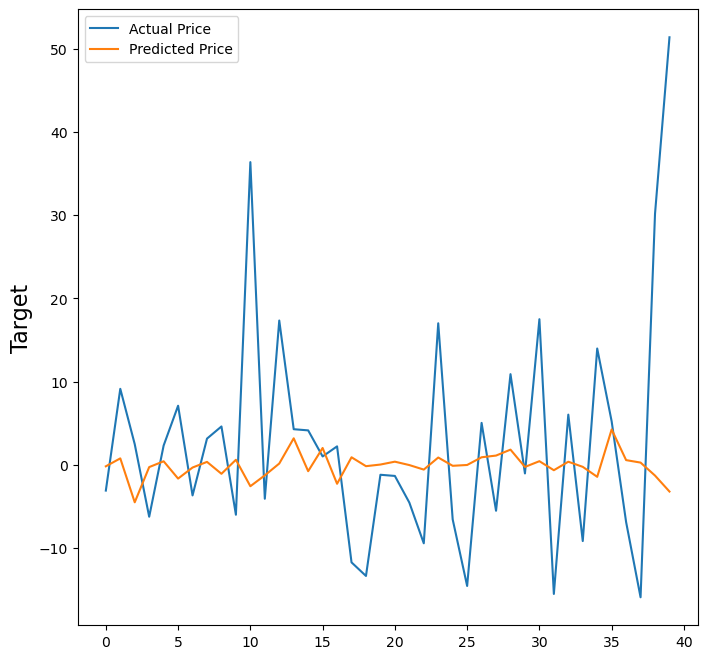

In [17]:
plt.figure(figsize=(8,8))
plt.ylabel('Target', fontsize=16)
plt.plot(dframe.head(40))
plt.legend(['Actual Price', 'Predicted Price'])
plt.show()

<Axes: >

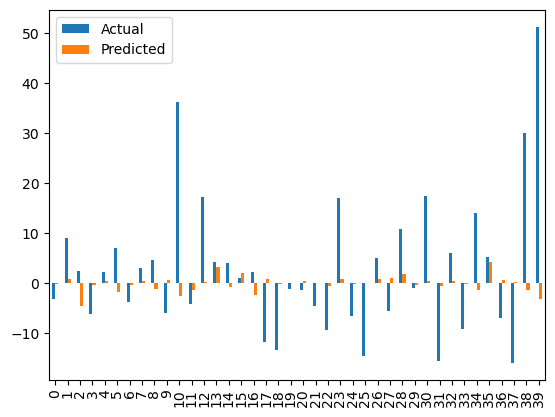

In [18]:
graph = dframe.head(40)
graph.plot(kind='bar')

## Model Performance with Test Data

In [19]:
y_test_pred = regressor.predict(x_val)

# Interception and coef.(to have an idea of training)

print("Regressor Coefficient: ",regressor.coef_)
print("Regressor Intercept: ",regressor.intercept_)

# predicting results
print("Predicted results: ",y_test_pred)

Regressor Coefficient:  [ 6.55924675e-05 -1.09817649e-04 -1.76976530e-04 -1.21448041e-09
  4.04368267e-02  1.31148663e+03  1.28915924e-10  2.47950016e+03
  7.35397935e-07  2.40667792e+03 -6.47973652e-07 -6.29851578e+03
  2.73514381e-06]
Regressor Intercept:  100.83074583702259
Predicted results:  [ 0.04685801 -0.10607432 -1.26466833 ... -2.53231122  0.04215804
  0.98759586]


In [20]:
dframe = pd.DataFrame({'Actual':y_val.flatten(), 'Predicted':y_test_pred.flatten()}) ## so we are able to see the data better presented below
dframe

,Actual,Predicted
0,-9.019971,0.046858
1,-2.189875,-0.106074
2,-3.799796,-1.264668
3,17.570257,1.098084
4,-6.470084,-0.329689
...,...,...
1047547,-3.420114,-1.946358
1047548,-5.429983,-0.995128
1047549,-4.540086,-2.532311
1047550,3.459454,0.042158


## MAE, MSE and RMSE

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_test_pred))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_val, y_test_pred)))

Mean Absolute Error: 6.313944360006702
Mean Squared Error: 87.24550052788939
Root Mean Square Error: 9.34052999180932


## Presenting results with graphs

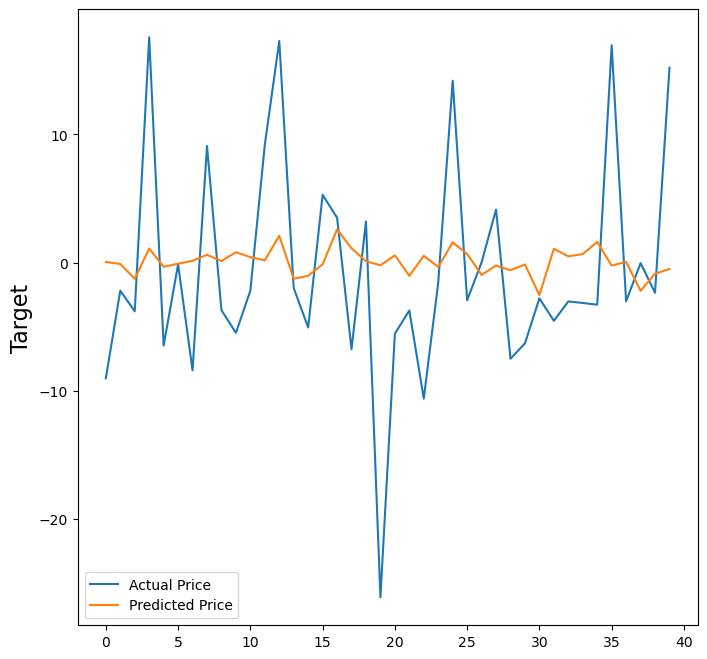

In [23]:
plt.figure(figsize=(8,8))
plt.ylabel('Target', fontsize=16)
plt.plot(dframe.head(40))
plt.legend(['Actual Price', 'Predicted Price'])
plt.show()

<Axes: >

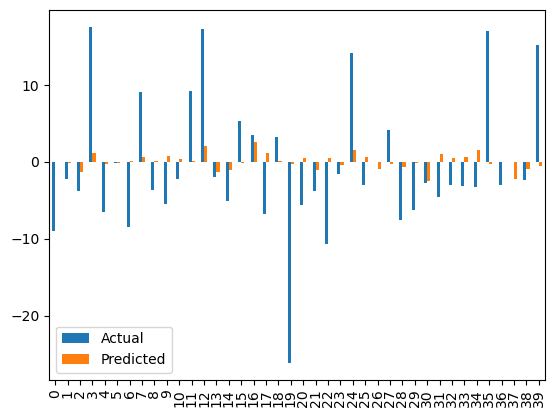

In [24]:
graph = dframe.head(40)
graph.plot(kind='bar')

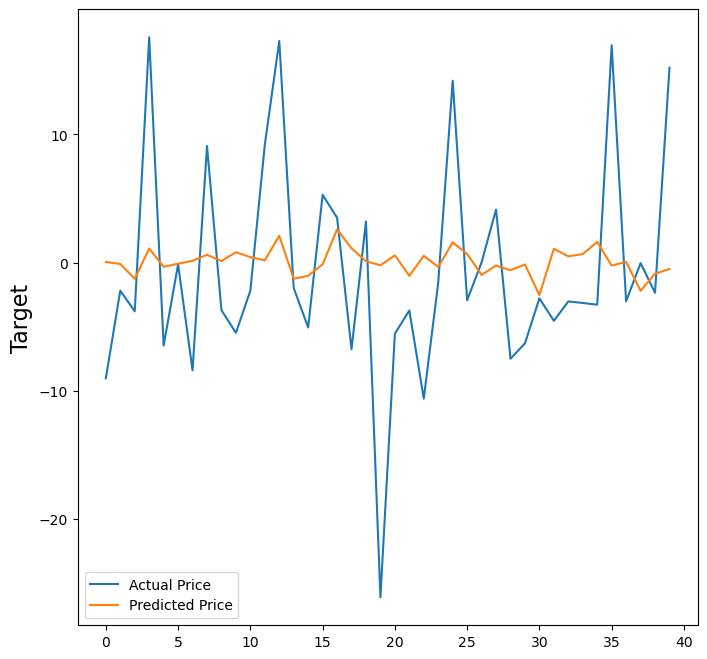

In [25]:
plt.figure(figsize=(8,8))
plt.ylabel('Target', fontsize=16)
plt.plot(dframe.head(40))
plt.legend(['Actual Price', 'Predicted Price'])
plt.show()